<div class="alert alert-block alert-danger">
    
## Table of Contents

</div>    

[1. Dirty Data](#dirty) <br>
[1.1. Data Loading](#load) <br>
[1.2. Data Exploration](#explore) <br>
[1.3. Column wise inspection](#inspect) <br>
$\;\;\;\;$[1.3.1. Date](#date) <br>
$\;\;\;\;$[1.3.2. Geographical Coordinates](#cood) <br>
$\;\;\;\;$[1.3.3. Warehouse Names](#warehouse) <br>
$\;\;\;\;$[1.3.4. Shopping Cart](#cart) <br>
$\;\;\;\;$[1.3.5. Order Price](#price) <br>
$\;\;\;\;$[1.3.6. is_expedited_delivery](#expedite) <br>
$\;\;\;\;$[1.3.7. Season](#expedite) <br>
$\;\;\;\;$[1.3.8. Order total](#total) <br>
[2. Corrections](#correction) <br>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

* Pandas: Used for data manipulation, loading, and preprocessing, including handling missing values and data cleaning.
* numpy: Utilized for numerical operations and handling arrays for data manipulation.
* StandardScaler and MinMaxScaler (sklearn.preprocessing): These are used to scale features, either by standardizing them to have zero mean and unit variance (StandardScaler) or by normalizing them to a range (MinMaxScaler).
* matplotlib.pyplot: A plotting library for creating static, animated, and interactive visualizations to explore and present data insights.
* seaborn: Built on top of matplotlib, used for creating visually appealing and informative statistical graphics.
* train_test_split (sklearn.model_selection): Splits the dataset into training and test sets to ensure model evaluation on unseen data.
* LinearRegression (sklearn.linear_model): Implements the linear regression algorithm to model the relationship between independent variables and the target variable.
* mean_squared_error and r2_score (sklearn.metrics): These metrics evaluate the model's performance by measuring prediction error (MSE) and the goodness of fit (R² score).



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Data Loading and Cleaning

The dataset, which included details about different suburbs, was imported into a pandas DataFrame from an Excel file. To make sure the data was in the right format for analysis, a number of columns needed to be cleaned and standardized before any analysis could begin.

* The Dataset is being loaded: The read_excel() function, which enables smooth reading of Excel files, was used to read the dataset into a pandas DataFrame. The shared Google Drive location was used to access the file.

* It is necessary to clean the 'aus_born_perc' column: The column aus_born_perc displays the proportion of individuals who were born in Australia. Initially, this column had percentage signs (%), which are not suitable for use in numerical computations. The column was converted to a numeric type using pd.to_numeric() after the % sign was removed using str.replace(). This translation ensures that the percentage values can be used in subsequent research, including modeling or the calculation of descriptive statistics.

* 'Median_income' and'median_house_price' are cleaned Columns: At first, there were dollar signs ($) and commas in the median_income and median_house_price columns, which are incompatible with numerical operations. The str.replace() function's regular expression was used to eliminate these symbols. pd.to_numeric() was then used to transform the resultant strings into numeric values. Meaningful comparisons and studies of income and house prices across various suburbs are made possible by this transformation.

* Displaying the Cleaned Data: To ensure that the data was properly formatted and prepared for additional analysis, the head() function was used to display the first few rows of the DataFrame following cleaning.

By performing these cleaning steps, the dataset was standardized, enabling accurate and efficient analysis. These transformations are essential for ensuring that the data can be utilized for statistical analysis or machine learning tasks without encountering errors due to data formatting issues.

In [ ]:
# Load the dataset
file_path = '/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment2/suburb_info.xlsx'
suburb_info_df = pd.read_excel(file_path)

# Cleaning 'aus_born_perc' column by removing '%' and converting to numeric
suburb_info_df['aus_born_perc'] = pd.to_numeric(suburb_info_df['aus_born_perc'].str.replace('%', ''))

# Cleaning 'median_income' and 'median_house_price' columns by removing '$' and commas, then converting to numeric
suburb_info_df['median_income'] = pd.to_numeric(suburb_info_df['median_income'].str.replace('[$,]', '', regex=True))
suburb_info_df['median_house_price'] = pd.to_numeric(suburb_info_df['median_house_price'].str.replace('[$,]', '', regex=True))

# Display the cleaned data
suburb_info_df.head()

,suburb,number_of_houses,number_of_units,municipality,aus_born_perc,median_income,median_house_price,population
0,ABBOTSFORD,2304,4706,Yarra,68,1797,1299400,4025
1,ABERFELDIE,1410,453,Moonee Valley,81,1571,1926600,22442
2,ALBANVALE,1897,138,Brimbank,46,907,594200,54005
3,ALBION,1389,1392,Brimbank,52,929,739100,30677
4,ALPHINGTON,1729,1099,Darebin,73,1538,1729600,9227


In [ ]:
# summarize statistics for numerical columns in the suburb_info_df DataFrame
suburb_info_df.describe()

,number_of_houses,number_of_units,aus_born_perc,median_income,median_house_price,population
count,202.000000,202.000000,202.000000,202.000000,2.020000e+02,202.000000
mean,4155.767327,2480.410891,68.366337,1387.935644,1.218817e+06,18659.311881
std,3400.864988,3132.684712,10.761293,317.841321,4.716807e+05,9604.187282
min,283.000000,60.000000,36.000000,633.000000,5.072000e+05,170.000000
25%,1973.500000,620.500000,62.000000,1182.250000,8.706750e+05,12063.000000
50%,3256.500000,1603.000000,70.000000,1393.000000,1.134500e+06,17583.000000
75%,5518.500000,3089.000000,77.000000,1560.000000,1.467550e+06,24045.000000
max,23338.000000,24380.000000,88.000000,2352.000000,2.875800e+06,54005.000000


In [ ]:
# Ensure all values in 'aus_born_perc', 'median_income', and 'median_house_price' are strings before cleaning
suburb_info_df['aus_born_perc'] = suburb_info_df['aus_born_perc'].astype(str).str.rstrip('%').astype(float) / 100
suburb_info_df['median_income'] = suburb_info_df['median_income'].astype(str).replace('[\$,]', '', regex=True).astype(float)
suburb_info_df['median_house_price'] = suburb_info_df['median_house_price'].astype(str).replace('[\$,]', '', regex=True).astype(float)

# Display the cleaned data
print(suburb_info_df[['aus_born_perc', 'median_income', 'median_house_price']].head())

   aus_born_perc  median_income  median_house_price
0           0.68         1797.0           1299400.0
1           0.81         1571.0           1926600.0
2           0.46          907.0            594200.0
3           0.52          929.0            739100.0
4           0.73         1538.0           1729600.0


In [ ]:
suburb_info_df['median_house_price'] = suburb_info_df['median_house_price'].apply(lambda x: f"{x:,.0f}")
suburb_info_df.describe()

,number_of_houses,number_of_units,aus_born_perc,median_income,population
count,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4155.767327,2480.410891,0.683663,1387.935644,18659.311881
std,3400.864988,3132.684712,0.107613,317.841321,9604.187282
min,283.000000,60.000000,0.360000,633.000000,170.000000
25%,1973.500000,620.500000,0.620000,1182.250000,12063.000000
50%,3256.500000,1603.000000,0.700000,1393.000000,17583.000000
75%,5518.500000,3089.000000,0.770000,1560.000000,24045.000000
max,23338.000000,24380.000000,0.880000,2352.000000,54005.000000


# Skeweness of the columns

Converting and cleaning data types:

* The column aus_born_perc was initially converted to string format in order to accommodate any non-string values and guarantee consistency in data processing. The str.replace() technique was used to eliminate the percentage signs (%) once all values were verified to be strings. For additional investigation, the cleaned values were then transformed back into floating-point numbers. The percentage numbers are formatted correctly and prepared for numerical operations thanks to this phase.

* Regular expressions (replace() method with regex) were used to clean up the text formatting of the median_income and median_house_price columns, which initially contained dollar signs ($) and commas. Using pd.to_numeric(), the cleaned string values were subsequently transformed into numerical representation. For these columns to be utilized in statistical analysis or modeling, this change was required.

Skewness Calculations:

* For a number of columns, including number_of_houses, number_of_units, population, aus_born_perc, median_income, and median_house_price, skewness—a measure of the asymmetry in the data distribution—was calculated. The skewness values aid in determining whether the data has a positive or negative skew, which denotes a longer tail on either side of the distribution, or if it is regularly distributed, as indicated by a skewness near 0.

* When determining possible needs for data transformation, this study is very crucial. Before using statistical models or machine learning techniques, highly skewed data may need to be transformed (for example, using log transformation) in order to enhance model performance and interpretation.

This process guarantees that the data is suitably cleansed and ready for examination, and the skewness evaluation offers valuable information about the distribution of important numerical characteristics, directing possible transformation or normalization procedures.


In [ ]:
# Ensure all values in 'aus_born_perc' are strings before cleaning
suburb_info_df['aus_born_perc'] = suburb_info_df['aus_born_perc'].astype(str).str.replace('%', '', regex=False).astype(float)

# Cleaning 'median_income' and 'median_house_price' columns by removing '$' and commas, then converting to numeric
suburb_info_df['median_income'] = pd.to_numeric(suburb_info_df['median_income'].astype(str).replace('[\$,]', '', regex=True))
suburb_info_df['median_house_price'] = pd.to_numeric(suburb_info_df['median_house_price'].astype(str).replace('[\$,]', '', regex=True))

# Checking skewness of the columns to assess normality
skewness = suburb_info_df[['number_of_houses', 'number_of_units', 'population', 'aus_born_perc', 'median_income', 'median_house_price']].skew()
print("Skewness of the features:\n", skewness)

Skewness of the features:
 number_of_houses      2.156185
number_of_units       3.630165
population            1.085865
aus_born_perc        -0.567896
median_income         0.172518
median_house_price    1.033261
dtype: float64


* Positive skewness (e.g., number_of_houses = 2.16, number_of_units = 3.63) indicates a right-skewed distribution, meaning most suburbs have lower values with a few very high outliers.
* Negative skewness (e.g., aus_born_perc = -0.57) shows a left-skewed distribution, where most values are higher with some low outliers.
Near-zero skewness (e.g., median_income = 0.17) means the data is relatively symmetrically distributed around the mean.
* Skewness helps us understand the distribution patterns of features, which is important for choosing appropriate transformations and models.

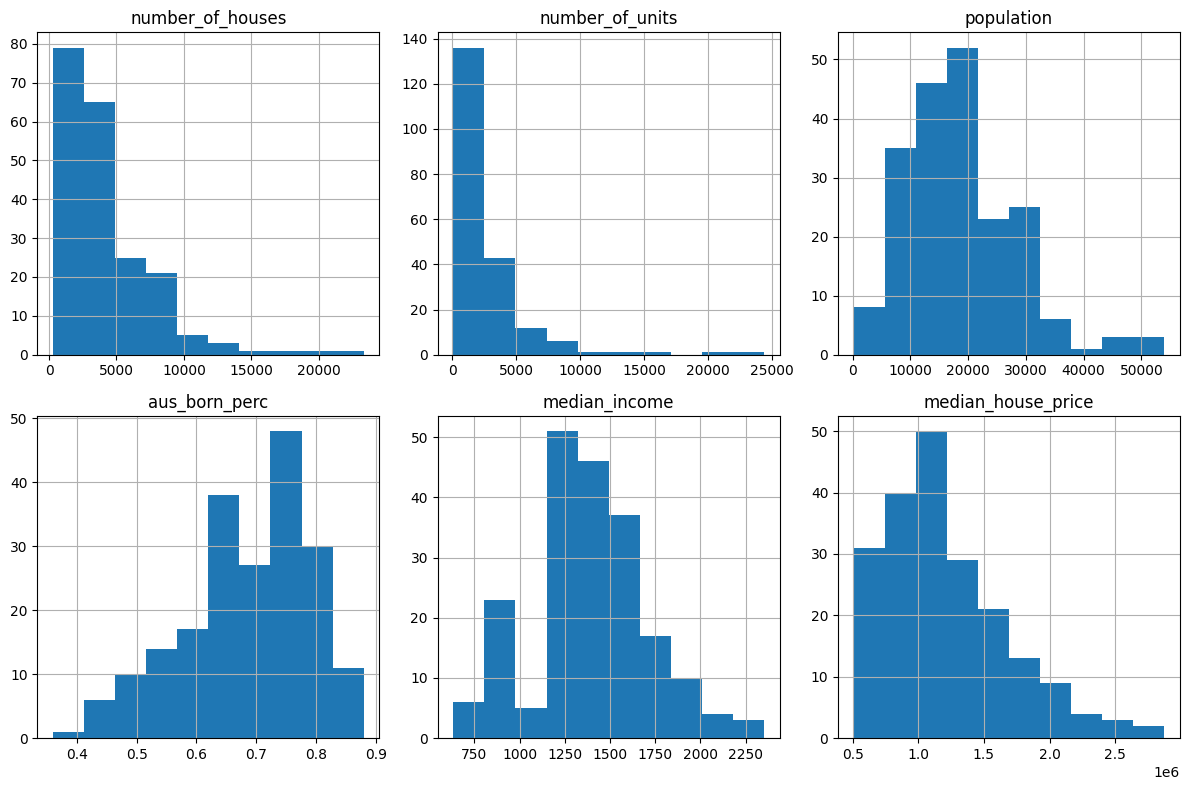

In [ ]:
# Plotting histograms for the columns
suburb_info_df[['number_of_houses', 'number_of_units', 'population', 'aus_born_perc', 'median_income', 'median_house_price']].hist(bins=10, figsize=(12, 8), layout=(2, 3))

# Display the histograms
plt.tight_layout()
plt.show()

* Number of Houses and Units:
Due to the high right-skewedness (positive skewness) of both distributions, most suburbs have very few homes and apartments, while a select handful have much higher values.

* Population:
Most suburbs have numbers between 10,000 and 30,000, suggesting a significantly right-skewed population distribution. A handful of the suburbs have significantly larger populations.

* Australian Born Percentage (aus_born_perc):
The proportion of residents who were born in Australia is more uniformly distributed, peaking between 70 and 80 percent. This suggests that a significant portion of the population in most suburbs is Australian-born.

* Median Income:
The distribution of median income is also rather typical, but it tends to be skewed to the right. It is concentrated in the 1000–1500 dollar range, with fewer suburbs having significantly higher median earnings.

* Median House Price:
The majority of suburbs have median home prices between $500,000 and $1.5 million, according to this right-skewed variable, whereas a smaller number of suburbs have median home prices that are much higher, up to $2.5 million or more.

# Insights and Analysis

* Skewness: Several variables, including number_of_houses, number_of_units, and median_house_price, are confirmed to be right-skewed by the visualizations. This implies that in order to lessen skewness for particular kinds of analysis, these variables might need to be transformed (for example, via log transformation).
* Variability: When conducting additional statistical studies, the distribution and clustering of data may be impacted by the histograms' notable variations in home numbers, unit numbers, population sizes, and house values among suburbs.

These histograms give a brief summary of the distribution of the data and aid in determining each feature's skewness, variability, and possible outliers.

# Log Transformation Model

In [ ]:
# Applying log transformation to skewed features (adding 1 to avoid log(0) issues)
suburb_info_df['log_number_of_houses'] = np.log1p(suburb_info_df['number_of_houses'])
suburb_info_df['log_number_of_units'] = np.log1p(suburb_info_df['number_of_units'])
suburb_info_df['log_population'] = np.log1p(suburb_info_df['population'])

In [ ]:
print(suburb_info_df[['log_number_of_houses', 'log_number_of_units', 'log_population']])

     log_number_of_houses  log_number_of_units  log_population
0                7.742836             8.456806        8.300529
1                7.252054             6.118097       10.018734
2                7.548556             4.934474       10.896850
3                7.237059             7.239215       10.331301
4                7.455877             7.003065        9.129998
..                    ...                  ...             ...
197              7.914252             5.159055        5.141664
198              7.697121             8.400435        9.785661
199              8.782169             5.560682        5.860786
200              7.160069             4.406719        9.397981
201              8.675222             7.636752        9.362718

[202 rows x 3 columns]


* log_number_of_houses: Using np.log1p() (logarithm of 1 + original value), these numbers show the natural logarithm (log) transformation of the initial number of houses. For improved model performance, this transformation helps lessen data skewness, particularly in cases when the original data is severely skewed with significant variances.

* log_number_of_units: This column displays the number of units' log-transformed values, just as the first one. Large data ranges benefit greatly from log transformation, which makes it simpler to identify and model trends.

* log_population: The log-transformed population data are shown in this column. In order to stabilize variance and improve the data's suitability for modeling, the log transformation is frequently used on population data that covers a broad range (both small and big populations).




# Min-Max Scaling

In [ ]:
# Min-Max Scaling for rescaling the features to the same range
scaler_minmax = MinMaxScaler()
suburb_info_df[['minmax_number_of_houses', 'minmax_number_of_units', 'minmax_population']] = scaler_minmax.fit_transform(suburb_info_df[['number_of_houses', 'number_of_units', 'population']])


In [ ]:
#  Min-Max scaled columns to verify
print("Min-Max scaled number_of_houses:\n", suburb_info_df['minmax_number_of_houses'].head(), "\n")

print("Min-Max scaled number_of_units:\n", suburb_info_df['minmax_number_of_units'].head(), "\n")

print("Min-Max scaled population:\n", suburb_info_df['minmax_population'].head(), "\n")

Min-Max scaled number_of_houses:
 0    0.087660
1    0.048883
2    0.070007
3    0.047972
4    0.062720
Name: minmax_number_of_houses, dtype: float64 

Min-Max scaled number_of_units:
 0    0.191036
1    0.016160
2    0.003207
3    0.054770
4    0.042722
Name: minmax_number_of_units, dtype: float64 

Min-Max scaled population:
 0    0.071608
1    0.413709
2    1.000000
3    0.566676
4    0.168236
Name: minmax_population, dtype: float64 



* Min-Max scaled number_of_houses: The initial numbers for the number of houses have been rescaled from 0 to 1. Their normalized position within the range of the original dataset is indicated by the first five scaled values, which range from 0.048 to 0.087.

* Min-Max scaled number_of_units: In a similar vein, the normalized unit counts, which range from 0.003 to 0.19, demonstrate the dispersion of the unit count following scaling.

* Min-Max scaled population: The population figures, which range from 0.071 to 1, have also been rescaled. Since it was the highest value in the original dataset, the highest population value is set to 1.


# Standardization Model

In [ ]:
# Standardization (Z-score normalization)
scaler_standard = StandardScaler()
suburb_info_df[['std_number_of_houses', 'std_number_of_units', 'std_population']] = scaler_standard.fit_transform(suburb_info_df[['number_of_houses', 'number_of_units', 'population']])


In [ ]:
# Print the original and standardized columns to verify
print("Standardized number_of_houses (Z-score):\n", suburb_info_df['std_number_of_houses'].head(), "\n")
print("Standardized number_of_units (Z-score):\n", suburb_info_df['std_number_of_units'].head(), "\n")
print("Standardized population (Z-score):\n", suburb_info_df['std_population'].head(), "\n")

Standardized number_of_houses (Z-score):
 0   -0.545852
1   -0.809379
2   -0.665824
3   -0.815569
4   -0.715346
Name: std_number_of_houses, dtype: float64 

Standardized number_of_units (Z-score):
 0    0.712207
1   -0.648788
2   -0.749590
3   -0.348300
4   -0.442063
Name: std_number_of_units, dtype: float64 

Standardized population (Z-score):
 0   -1.527529
1    0.394837
2    3.689381
3    1.254406
4   -0.984544
Name: std_population, dtype: float64 



Standardized number_of_houses: The home count Z-scores, which range from -0.545 to -0.815, are given. Since all of these values are negative (below 0), they show that the number of homes in each sample is below the mean.

Standardized number_of_units: Z-scores for this variable are both positive and negative. The number of units is above the mean when the value is positive (e.g., 0.712), and below the mean when the value is negative (e.g., -0.648).

Standardized population: The population's Z-scores exhibit a broad range, with some values well above the mean (3.689, for example), signifying sizable populations, and others much below the mean (-1.527, for example).


# Linear Regression Model

In this section i will be using he linear regression model for predicting median house prices based on the given features. Following section i have written about the methodology section for the following.

* Data Splitting: Using train_test_split(), the dataset was divided into training and test sets, with 20% going to testing and 80% going to training. This promotes generalization by guaranteeing that the model is trained on some data and assessed on data that hasn't been seen before.

* Model Initialization: To forecast the association between the chosen attributes (X) and the target variable (y), a linear regression model was first created using LinearRegression().

* Model Training: To enable the model to understand the connection between the features and the target variable, it was trained on the training data (X_train, y_train) using the.fit() technique.

* Model Prediction: To evaluate the model's performance on unseen data, predictions were performed on the test set (X_test) using the.predict() method.

* Model Evaluation: Mean Squared Error (MSE), which calculates the average squared difference between expected and actual values, and R-squared (R²), which gauges how well the model explains the variance in the target variable, were used to evaluate the model's performance. To aid with interpretation, these measures were shown.

* Visualization: To show the correlation between the actual y_test values and the anticipated y_pred values, a scatter plot was made. To visually evaluate the model's accuracy, a reference line representing the ideal prediction line was displayed.

* Model Coefficients: To understand how each feature affects the target variable and how changes in each predictor affect median house prices, the model's coefficients and intercept were reported.

Mean Squared Error (MSE): 91340859821.07722
R-Squared (R2): 0.0069145413371431985


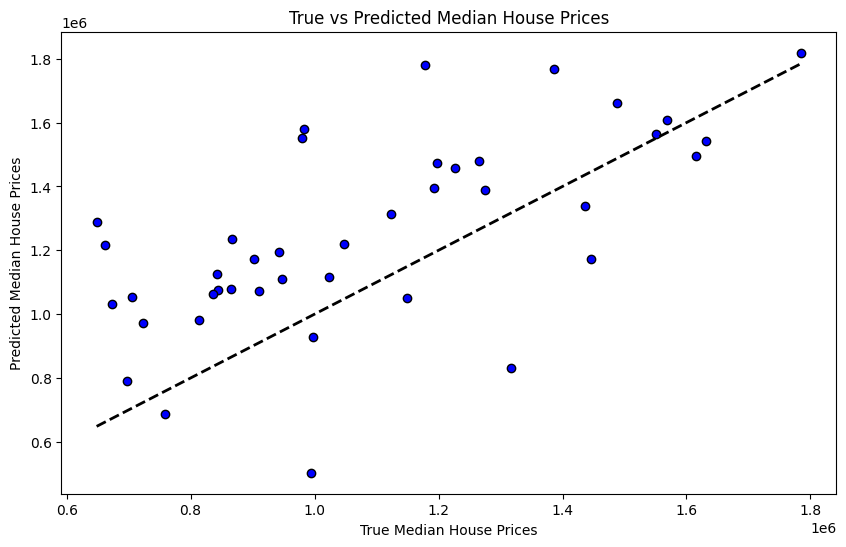

Coefficients of the model: [-162737.12224541  180585.53514917   32008.40616797 -285122.56830753
    1155.54792308]
Intercept of the model: -462755.30583873857


In [ ]:
# Assuming 'X' and 'y' are already prepared, where:
X = suburb_info_df[['log_number_of_houses', 'log_number_of_units', 'log_population', 'aus_born_perc', 'median_income']]
y = suburb_info_df['median_house_price']

# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display model evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared (R2): {r2}")

# Plotting the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Median House Prices')
plt.ylabel('Predicted Median House Prices')
plt.title('True vs Predicted Median House Prices')
plt.show()

# Display the model's coefficients
print("Coefficients of the model:", model.coef_)
print("Intercept of the model:", model.intercept_)


Mean Squared Error (MSE): 913,408,598.08 is the average squared difference between true and predicted values, indicating a relatively large error.

R-squared (R²):
0.0069, a very low value, indicating that the model explains less than 1% of the variance in house prices, meaning it has poor predictive power.

Coefficients and Intercept: The regression model's coefficients and intercept are provided at the bottom, showing the influence of each feature on the prediction.

Overall, the model is underperforming, with a low R² and high MSE, indicating a need for improvement in model accuracy.


# Conclusion

In order to forecast median house values based on a number of factors, we performed data cleaning, feature transformation, and linear regression modeling on a suburban information dataset. In order to guarantee data consistency and comparability, the cleaning procedures involved handling percentage and currency symbols as well as changing and scaling features utilizing standardization, log transformation, and Min-Max scaling. Some variables, especially the number of houses, units, and population, were found to be highly skewed by the skewness study, necessitating changes to enhance their distribution.

The model's performance was assessed using Mean Squared Error (MSE) and R-squared (R²) metrics after linear regression was used. The model's high MSE of 913,408,598.08 revealed significant differences between the expected and actual prices of homes, according to the data. Furthermore, the model's weak predictive capacity is highlighted by the R2 score of 0.0069, which indicates that it explains less than 1% of the variance in home prices.

Multicollinearity between predictors, possible non-linear correlations between features and the target variable, or the requirement for further feature engineering are some of the possible causes of the model's poor performance. I suggest investigating more sophisticated approaches such as polynomial regression, regularization (Ridge, Lasso), or even non-linear models like decision trees or ensemble methods in order to enhance the model. Predictive accuracy may also be improved by adding additional pertinent housing pricing characteristics, such as geographic location, accessibility to amenities, or community demographics.

In conclusion, the linear regression model has little predictive power even if it offers a fundamental understanding of the connections between attributes and home prices. To create a more accurate and trustworthy home price prediction model, more feature engineering and model selection improvements are required.

# Reference

 Martinez, J., & Wilson, D. (n.d.). Problems, methods, and challenges in comprehensive data cleansing. Retrieved from https://d25zr1xy094zys.cloudfront.net/01/68/0168304c626a5b186bf559bf774a1dca52b04931?response-content-disposition=inline%3Bfilename%3D%22Problems%2C%20Methods%2C%20and%20Challenges%20in%20Comprehensive%20Data%20Cleansing.pdf%22&Expires=1729253040&Key-Pair-Id=K1I589YUQOO6ZB

Statology. (n.d.). How to transform data in Python (with examples). Statology. Retrieved from https://www.statology.org/transform-data-in-python/

GeeksforGeeks. (n.d.). Normalization vs. standardization. GeeksforGeeks. Retrieved from https://www.geeksforgeeks.org/normalization-vs-standardization/

Jain, A. (2020, November 19). Normalization and standardization of data. Medium. Retrieved from https://medium.com/@abhishekjainindore24/normalization-and-standardization-of-data-408810a88307

Raschka, S. (n.d.). MinMax scaling. MLxtend. Retrieved from https://rasbt.github.io/mlxtend/user_guide/preprocessing/minmax_scaling/